# 12 - Strojno uƒçenje za kategorizacijo podatkov
<p style="font-weight: 600; text-align: center;">
Matematiƒçno-fizikalni praktikum, avgust 2024 <br>
Luka Skeled≈æija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
   
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

Dandanes je uporaba razliƒçnih algoritmov strojnega uƒçenja (Machine Learning, ML) v 
znanosti ≈æe rutinsko opravilo. Poznamo tri osnovne vrste stojnega uƒçenja:

  - Nadzorovano uƒçenje (Supervised learning):
    - Klasifikacija (Classification): sortiranje v razliƒçne kategorije.
    - Regresija (Regression): modeliranje oz. `fitanje' napovedi.
  - Nenadzorovano uƒçenje ( npr. sam najdi kategorije).
  - Stimulirano uƒçenje ( Artificial Intelligence v o≈æjem pomenu besede).

V fiziki (in tej nalogi), se tipiƒçno ukvarjamo s prvo kategorijo, bodisi za identifikacijo novih pojavov delcev ali pa za ekstrakcijo napovedi (netrivialnih funkcijskih odvisnosti etc).

ML algoritmi imajo prednost pred klasiƒçnim pristopom, da lahko uƒçinkovito razdrobijo kompleksen problem na enostavne elemente in ga ustrezno opi≈°ejo:

  - pomisli na primer, kako bi bilo te≈æko kar predpostaviti/uganiti 
  pravo analitiƒçno funkcijo v veƒç dimenzijah ( in je npr. uporaba zlepkov 
  (spline interpolacija) mnogo la≈æja in bolj≈°a ).
  - Pri izbiri/filtriranju velike koliƒçine podatkov z mnogo lastnostmi 
  (npr dogodki pri trkih na LHC) je zelo te≈æko najti koliƒçine, ki optimalno 
  loƒçijo signal od ozadnja, upo≈°tevati vse korelacije in najti optimalno kombinacijo 
  le-teh

ƒåe dodamo malce matematiƒçnega formalizma strojnega uƒçenja: Predpostavi, da imamo na voljo nabor primerov 
$\mathcal{D}=\left\{\left(\mathbf{x}_{k}, y_{k}\right)\right\}_{k=1 . N},$ kjer je
$\mathbf{x}_{k}=\left(x_{k}^{1}, \ldots, x_{k}^{M}\right)$ nakljuƒçno izbrani vektor
 $M$ lastnosti (karakteristik) in je $\mathbf{y}_{k} = \left(y_{k}^{1}, \ldots, y_{k}^{Q}\right)$
 vektor $Q$ ciljnih vrednosti, ki so lahko bodisi binarne ali pa realna 
 ≈°tevila. 
 Vrednosti $\left(\mathbf{x}_{k}, \mathbf{y}_{k}\right)$ so neodvisne in porazdeljene po neki
 neznani porazdelitvi $P(\cdot, \cdot) .$ Cilj ML metode je doloƒçiti (priuƒçiti) funkcijo
 $h: \mathbb{R}^{Q} \rightarrow \mathbb{R}$, ki minimizira priƒçakovano vrednost **funkcije
 izgube (expected loss)** $$\mathcal{L}(h)=\mathbb{E}\, L(\mathbf{y}, \mathbf{h}(\mathbf{x})) = \frac{1}{N}\sum\limits_{k=1}^{N} L(\mathbf{y_k}, \mathbf{h}(\mathbf{x_k})). $$ 
 Tu je $L(\cdot, \cdot)$  gladka funkcija, ki opisuje oceno za kvaliteto napovedi, 
 pri ƒçemer so  vrednosti $(\mathbf{x}, \mathbf{y})$
 neodvisno  vzorƒçene iz nabora $\mathcal{D}$ po porazdelitvi $P$. Po koncu uƒçenja
 imamo torej na voljo funkcijo $\mathbf{h}(\mathbf{x})$, ki nam za nek vhodni nabor vrednosti
 $\mathbf{\hat{x}}$ poda napoved $\mathbf{\hat{y}}=\mathbf{h}(\mathbf{\hat{x}})$, ki ustrezno kategorizira
 ta nabor vrednosti. 
 
 Funkcije $\mathbf{h}$ so v praksi sestavljene iz (mno≈æice) preprostih funkcij z (nekaj) prostimi
 parametri, kar na koncu seveda pomeni velik skupni nabor neznanih parametrov in zahteven
 postopek minimizacije funkcije izgube. 
 
 Osnovni gradnik odloƒçitvenih dreves je tako kar stopniƒçasta funkcija $H(x_i-t_i)={0,1}$, ki je enaka
 ena za $x_i > t_i$ in niƒç drugaƒçe in kjer je $x_i$ ena izmed karakteristik in $t_i$ neznani parameter.
Iz skupine tak≈°nih funkcij, ki predstavljajo binarne odloƒçitve lahko skonstruiramo konƒçno ute≈æeno 
funkcijo $\mathbf{h}(\mathbf{x})=\sum\limits_{i=1}^{J} \mathbf{a}_{i}\, H(x_i-t_i),$ kjer so $\mathbf{a}_i$ vektorji neznanih ute≈æi. 
Tako $t_i$ kot $\mathbf{b}_i$, lahko doloƒçimo v procesu uƒçenja. Nadgradnjo predstavljajo nato *pospe≈°ena* odloƒçitvena
drevesa (BDT), kjer nadomestimo napoved enega drevesa z ute≈æeno mno≈æico le-teh, tipiƒçno dobljeno
v ustreznih iterativnih postopkih (npr. AdaBoost, Gradient Boost ipd.).

Pri nevronskih mre≈æah je osnovni gradnik t.i. *perceptron*, ki ga opisuje preprosta funkcija
$h_{w,b}(\mathbf{X})=\operatorname{\theta}\left(\mathbf{w}^{T} \cdot \mathbf{X} + b\right),$
kjer je $\mathbf{X}$ nabor vhodnih vrednosti, $\mathbf{w}$ vektor vrednosti ute≈æi, s katerimi
tvorimo ute≈æeno vsoto ter $b$ dodatni konstatni premik (bias). Funkcija $\theta$ je preprosta
gladka funkcija (npr. $\arctan$), ki lahko vpelje nelinearnost v odzivu perceptrona. Nevronska
mre≈æa je nato sestavljena iz (poljubne) topologije tak≈°nih perceptronov, ki na zaƒçetku
sprejme karakteristiko dogodka $\mathbf{x}$ v konƒçni fazi rezultirajo v napovedi $\mathbf{\hat{y}}$, ki 
mora seveda biti ƒçim bli≈æje ciljni vrednosti $\mathbf{y}$. Z uporabo ustrezne funkcije 
izgube (npr MSE: $\mathcal{L}(h)=\mathbb{E}\, ||\mathbf{y}-\mathbf{\hat{y}}||^2$, se problem znova prevede na
minimizacijo, kjer i≈°ƒçemo optimalne vrednosti (velikega) nabora ute≈æi $\mathbf{w}_i$ ter
$b_i$ za vse perceptrone v mre≈æi. Globoke nevronske mre≈æe (DNN) niso niƒç drugega, kot 
velike nevronske mre≈æe ali skupine le-teh. 

≈Ωe namizni raƒçunalniki so
dovolj moƒçni za  osnovne raƒçunske naloge, obstajajo pa tudi ≈æe zelo uporabniku prijazni vmesniki v jeziku Python, na primer:

  - Scikit-Learn (scikit-learn.org): odprtokodni paket za strojno uƒçenje,
  - TensorFlow (tensorflow.org): odprtokodni Google-ov sistem za ML, s poudarkom na globokih nevronskih mre≈æah 
  ( Deep Neural Networks, DNN) z uporabo vmesnika Keras. Prilagojen za delo na GPU in TPU. 
  - Catboost: (Catboost.ai) : odprtokodna knji≈ænica za uporabo pospe≈°enih odloƒçitvenih dreves (Boosted Decision Trees, BDT). Prilagojena za delo na GPU.

Za potrebe naloge lahko uporabimo tudi spletni vmesnik Google Collab (colab.research.google.com), ki dopu≈°ƒça omejen dostop 
do veƒçjih raƒçunskih zmogljivosti.


## Naloga

Na spletni uƒçilnici je na voljo material (koda, vzorci) za 
loƒçevanje dogodkov Higgsovega bozona od ostalih procesov ozadja. V naboru simuliranih 
dogodkov je 18 karakteristik (zveznih kinematiƒçnih lastnosti), katerih vsaka 
posamezno zelo slabo loƒçi 'signal' od ozadja, z uporabo BDT ali (D)NN, pa lahko tu dose≈æemo
zelo dober uspeh.  Na predavanjih smo si ogledali glavne aspekte pomembne pri implementaciji ML, 
kot so  uporaba ustreznih spremenljivk (GIGO), uƒçenje in prekomerno uƒçenje (training/overtraining), 
vrednotenje uspeha metode kot razmerje med uƒçinkovitostjo (efficiency) in ƒçistostjo (precision) 
vzorca (Receiver Operating Characteristic, ROC). Doloƒçi uspe≈°nost obeh metod (in nari≈°i ROC) 
za nekaj tipiƒçih konfiguracij BDT in DNN, pri ƒçemer:

  - ≈†tudiraj vpliv uporabljenih vhodnih spremenljivk - kaj, ƒçe vzamemo le nekatere?
  - ≈†tudiraj BDT in NN in vrednoti uspe≈°nost razliƒçnih nastavitev,  ƒçe spreminja≈° nekaj konfiguracijskih parametrov
  (npr. ≈°tevilo perceptronov in plasti nevronskih mre≈æ pri DNN in ≈°tevilo dreves pri BDT). 

**Dotatna naloga:**

Implementiraj distribucije iz ‚Äòplayground‚Äô zgleda v BDT (lahko tudi RandomForests) in DNN,
te distribucije so na voljo v vseh popularnih ML paketih (npr. Scikit...).

In [170]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
import scipy as sc
from matplotlib import animation
import logging
import timeit
import time
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
plt.rcParams["figure.edgecolor"] = "black"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


## Dodatek - Klasifikacija sintetiƒçnih distribucij

Tokrat dodatek postavimo na zaƒçetek poroƒçila, da bolje ilustriramo, kaj bomo v nadaljevanju poƒçeli. ≈Ωelimo namreƒç  bomo na zaƒçetku s pomoƒçjo DNN (Deep Neural Networks) in BDT (Boosted Decision Trees) klasificirali sintetiƒçne distribucije iz paketa `SciKit learn`. Iz tega poƒçetja lahko opazimo nekaj razlik v delovanju obeh klasifikacijskih metod.

Pri metodi BDT smo za hiperparametre nastavili:
- maksinalno ≈°tevilo dreves: 100
- maksimalna globina drevesa: 6
- funkcija neƒçistosti: Logloss
- normalizacija: brez

Za DNN pa smo za hiperparametre uporabili:
- ≈°tevilo nevronov: 50
- ≈°tevilo skritih plasti: 5
- aktivacijska funkcija: ReLU
- aktivacijska funkcija na koncu: sigmoid
- optimizacijski algoritem: adam
- funkcija izgube: binary cross-entrophy
- normalizacija $\mu = 0$ in $\sigma = 1$
- ≈°tevilo epoh: 200
- velikost batchov: 1000
- odstotek za testiranje: 20 %

In [171]:
import tensorflow as tf
from catboost import CatBoostClassifier
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


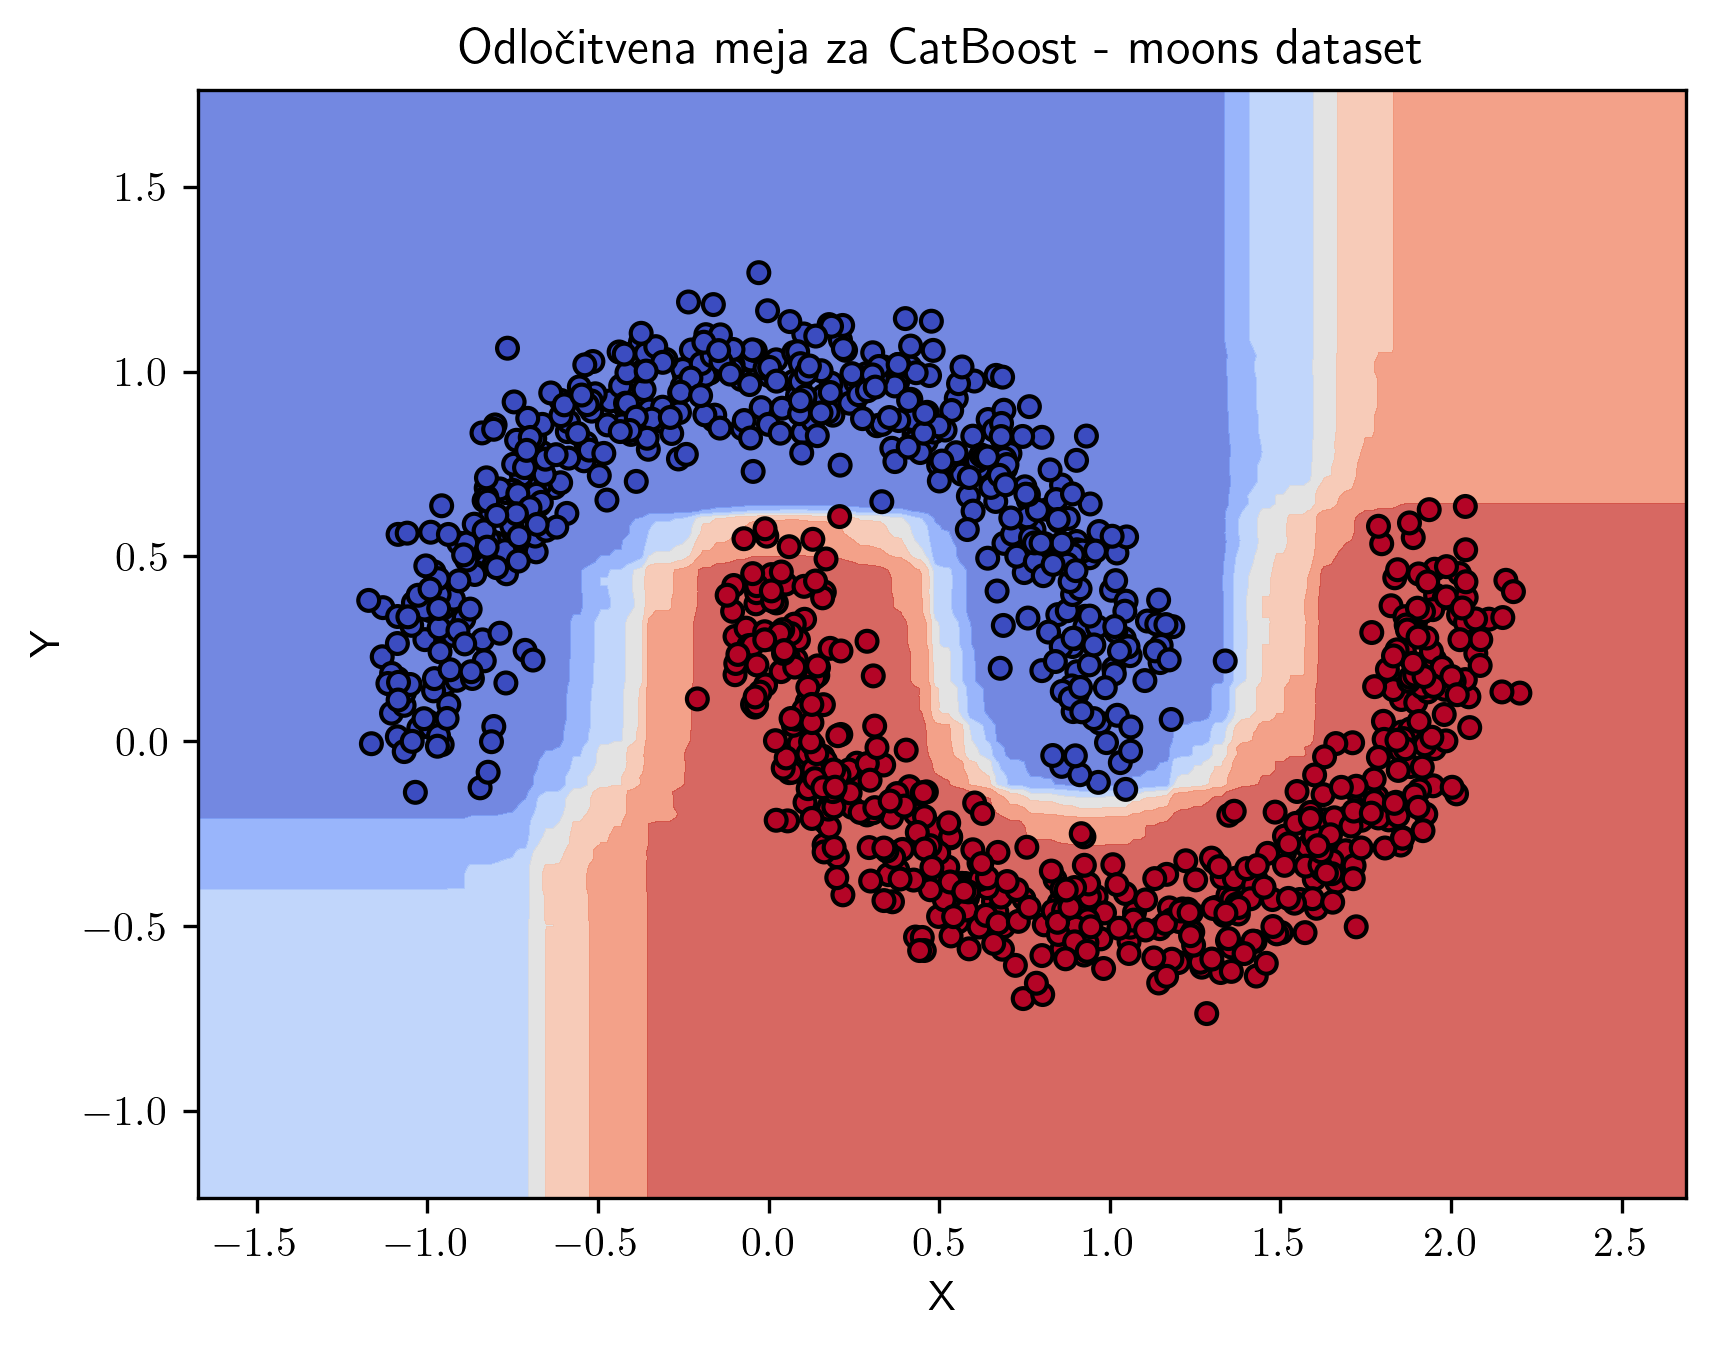

In [172]:

model = CatBoostClassifier(iterations=100, depth=6, loss_function='Logloss', verbose=0)
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_proba = model.predict_proba(X_test)
loss = log_loss(y_test, y_pred_proba)

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Odloƒçitvena meja za CatBoost - moons dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [173]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=1000,
    validation_split=0.1,
    verbose=0  # Set to 1 if you want to see training progress
)

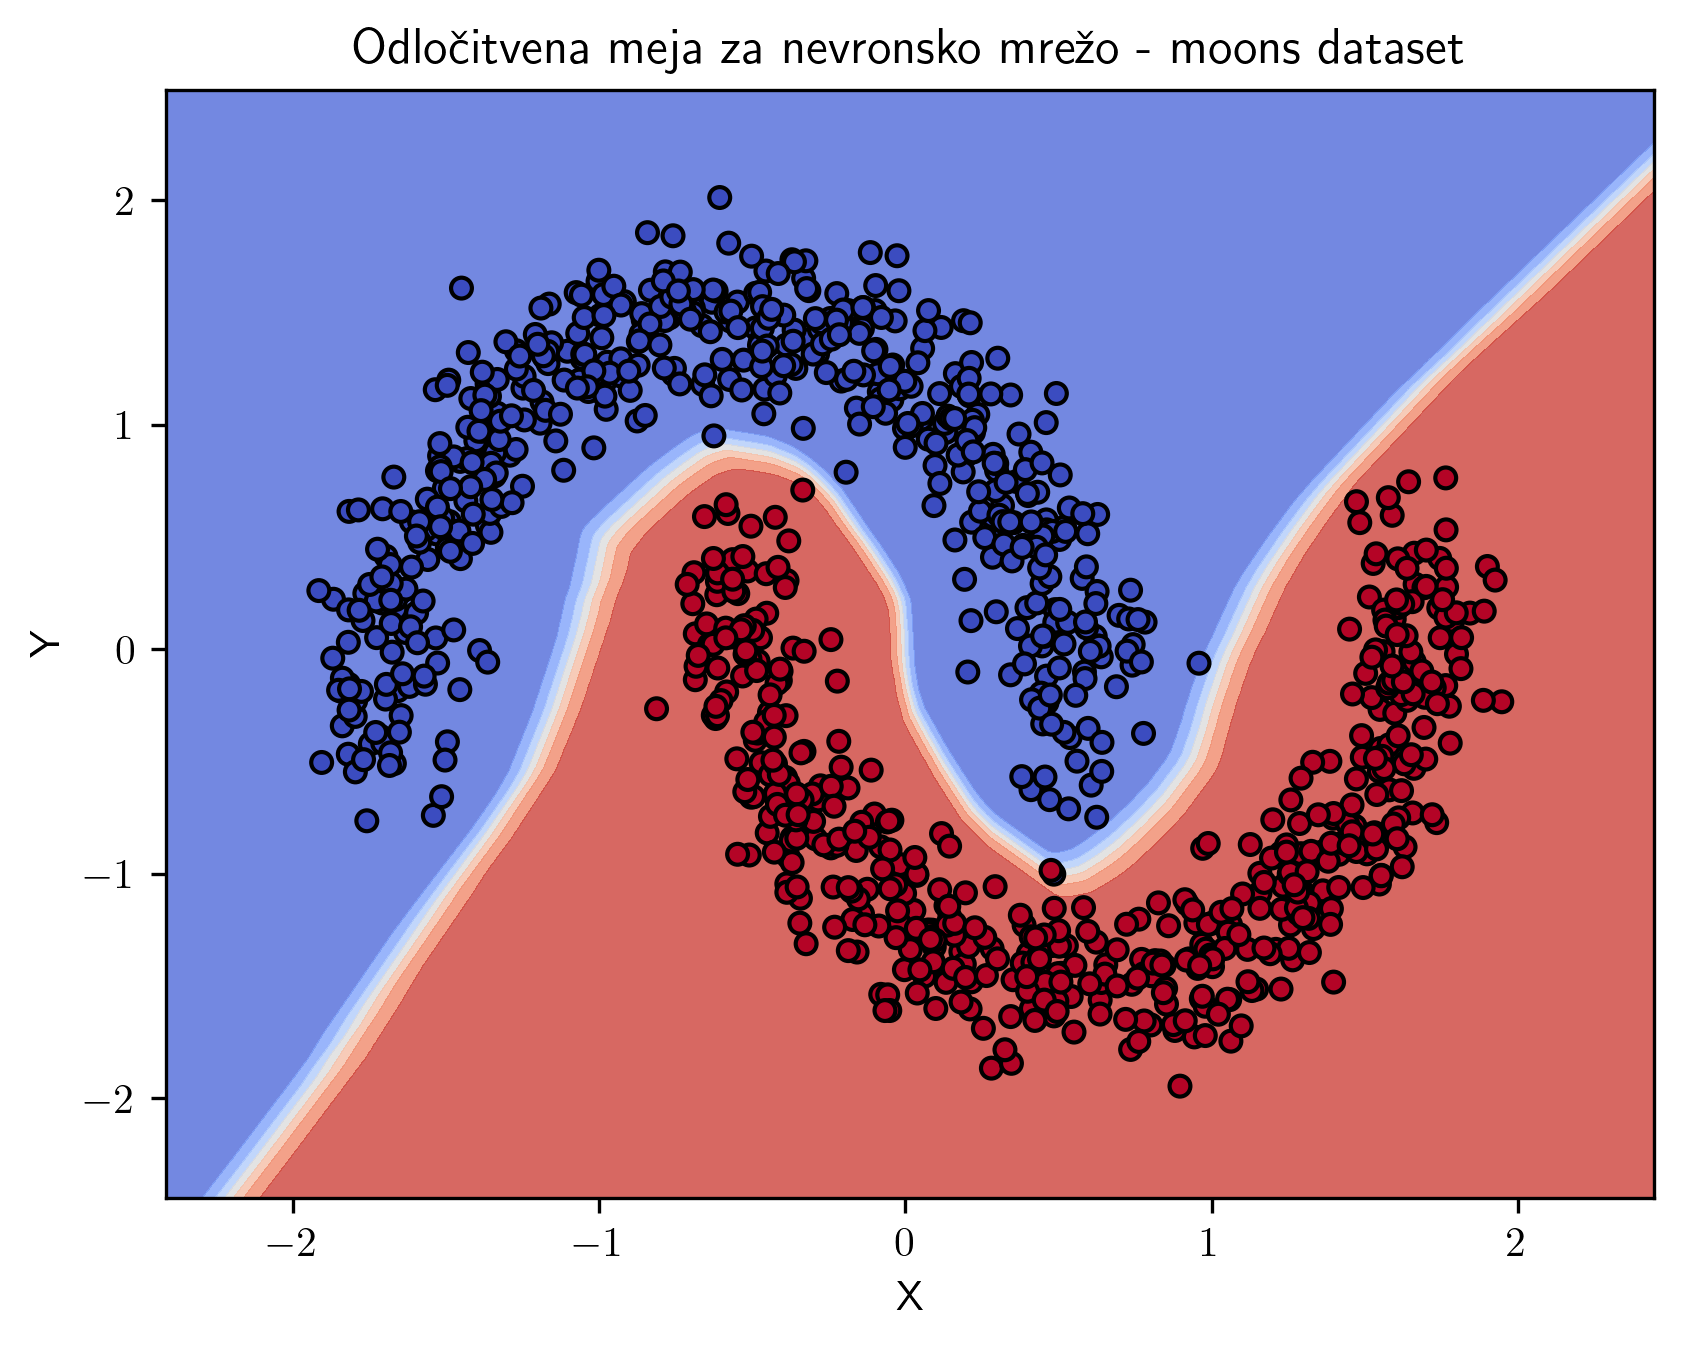

In [174]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Odloƒçitvena meja za nevronsko mre≈æo - moons dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [175]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

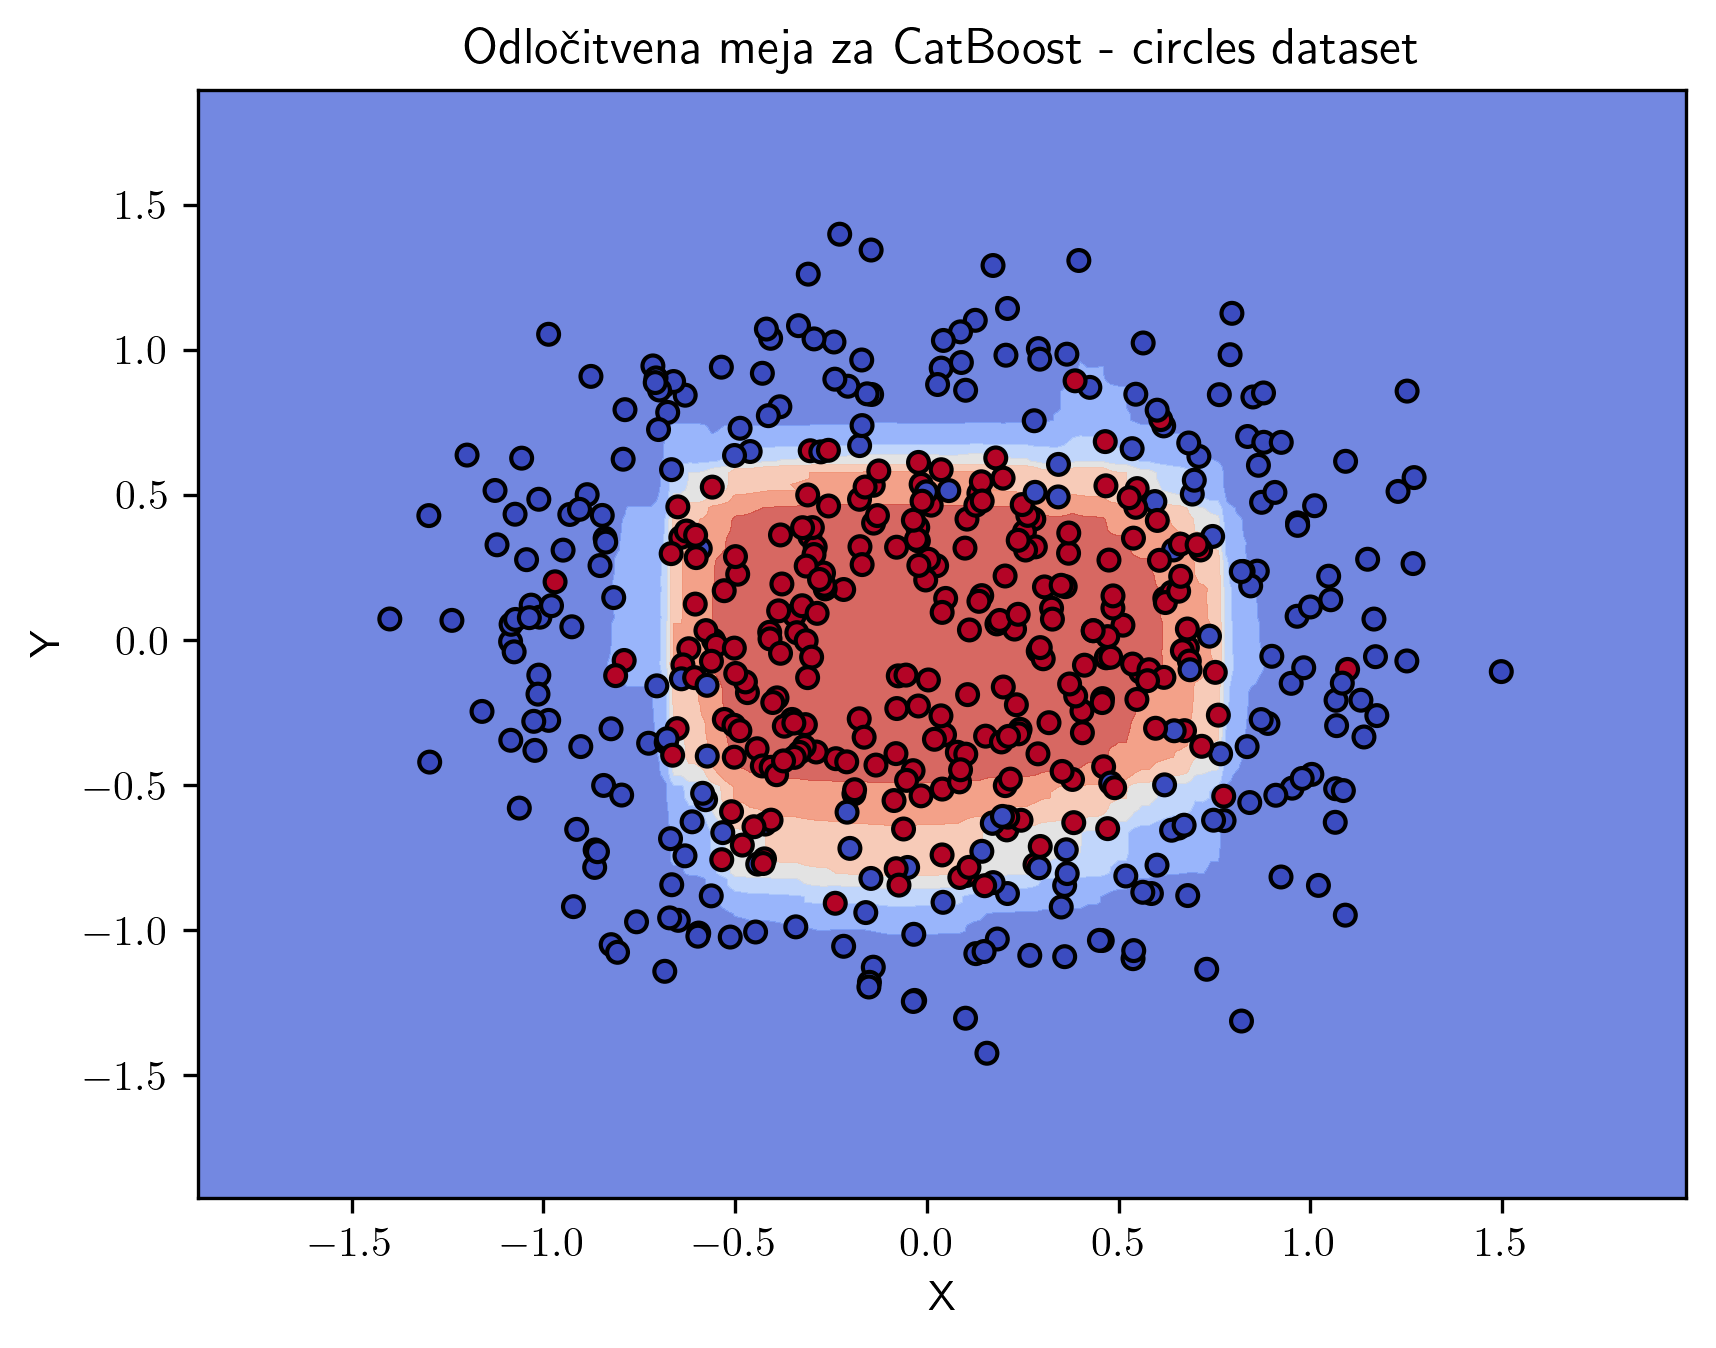

In [176]:

model = CatBoostClassifier(iterations=100, depth=6, loss_function='Logloss', verbose=0)
model.fit(X_train, y_train)

# Predict probabilities and calculate log loss
y_pred_proba = model.predict_proba(X_test)
loss = log_loss(y_test, y_pred_proba)

# Plotting the decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.title('Odloƒçitvena meja za CatBoost - circles dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [177]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)), 
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=1000,
    validation_split=0.1,
    verbose=0  # Set to 1 if you want to see training progress
)

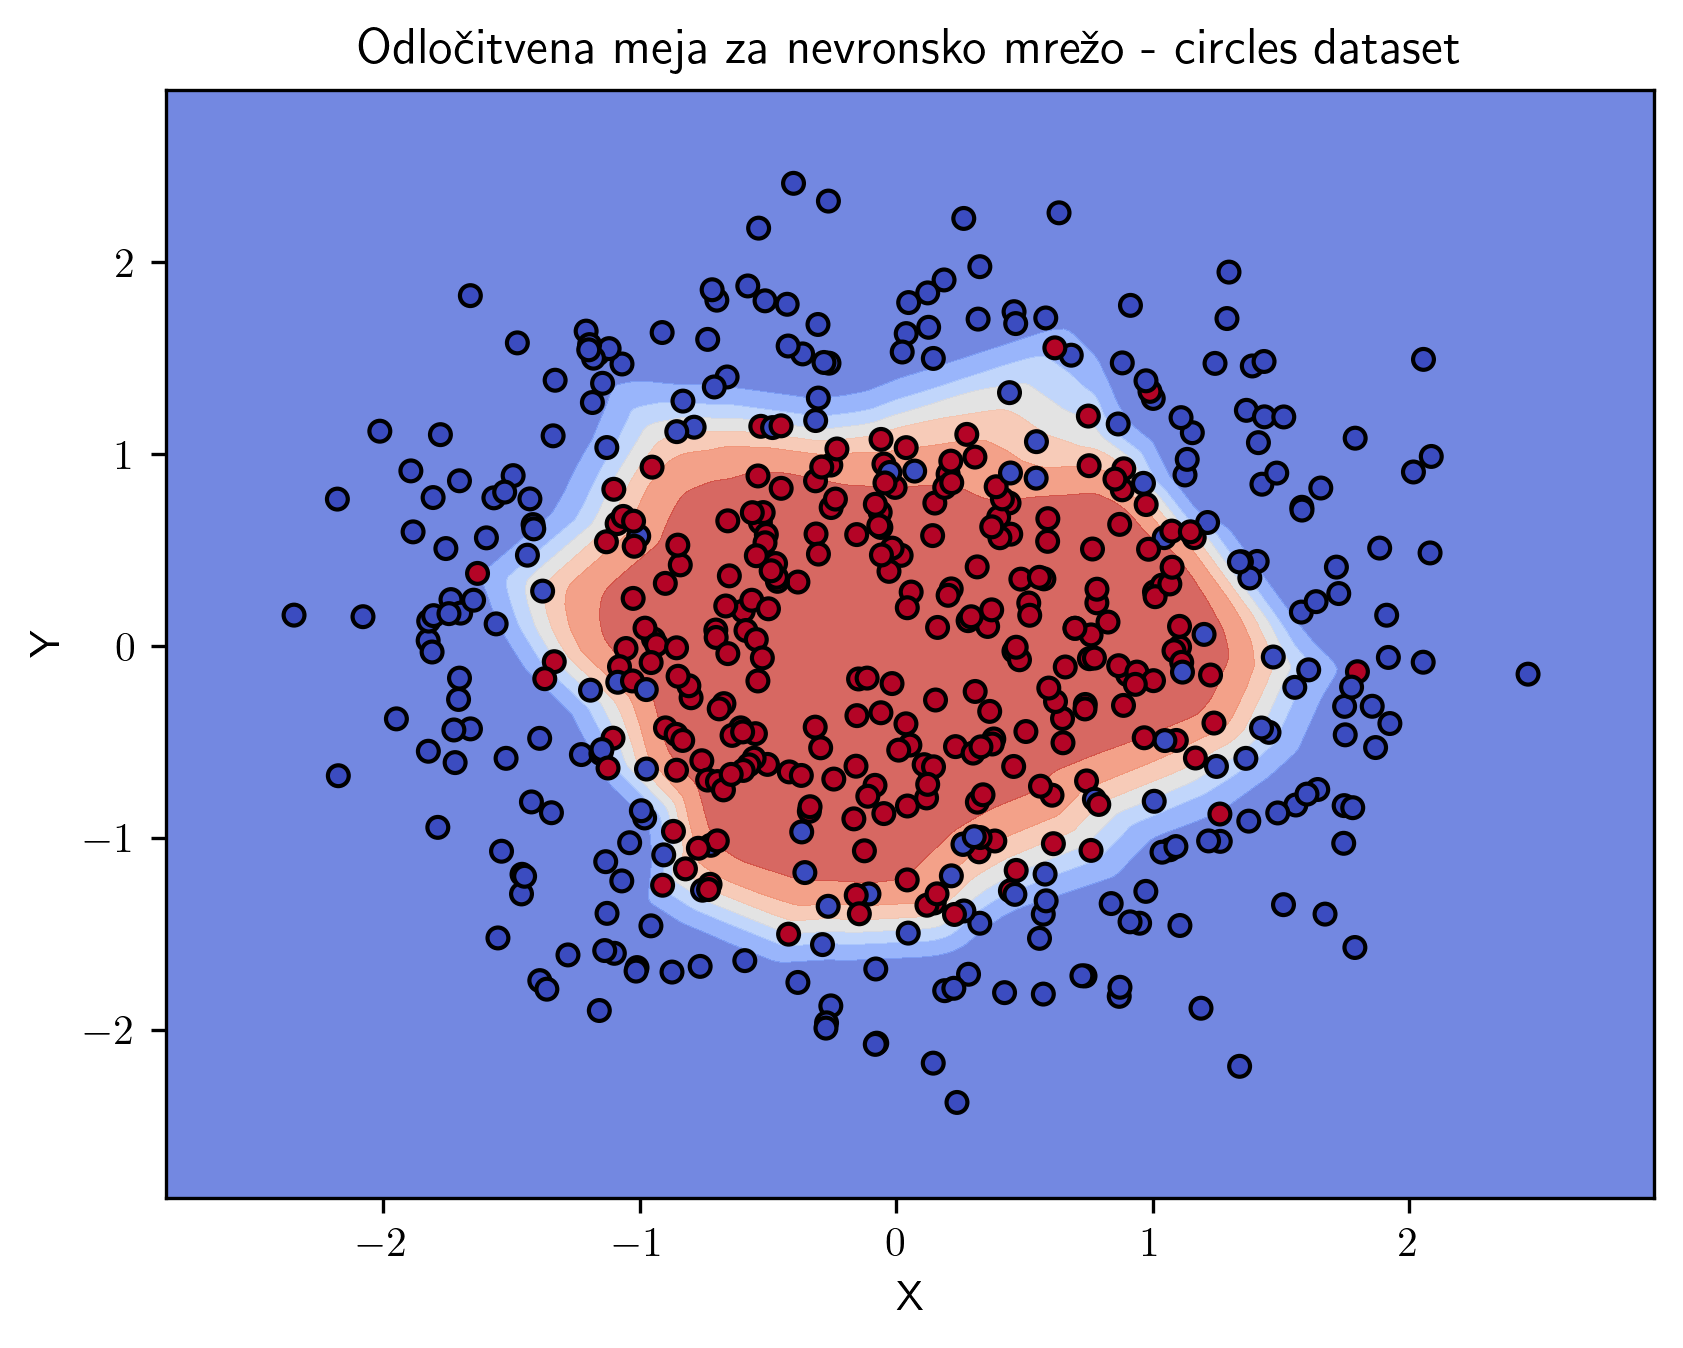

In [178]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=25, cmap='coolwarm')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Odloƒçitvena meja za nevronsko mre≈æo - circles dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Opazimo, da meje pri globokih nevronskih mre≈æah izgledajo mnogo bolj zvezno in se bolje prilagajajo podatkom. Oƒçitna prednost algoritmov tipa BDT pa je hitrost - tako inference kot treninga.

## Detektiranje Higgsovega bosona

Ker imamo opravka s strojnim uƒçenjem, velik del zgodbe predstavljajo tudi podatkovni seti. Zato se mi zdi prav, da najprej pokomentiramo ≈°e podatke, na katerih se bo stroj uƒçil. 

Na voljo imamo podmno≈æico 18 zveznih spremenljivk iz podatkovnega seta [HIGGS](https://archive.ics.uci.edu/dataset/280/higgs). Gre za kinematiƒçne lastnosti kot jih izmerijo detektorji v trkalniku delcev LHC (Large Hadron Collider). Celoten podatkovni set je bil zgeneriran s pomoƒçjo Monte Carlo simulacij trkov in slu≈æi za trening algoritmov, ki zmorejo klasificirati podatke dobljene iz dejanskih eksperimentov. V spodnji tabeli najdemo skromen opis posameznih spremenljivk oz. "feature"-jev. 

| #  | Lastnost     | Opis lastnosti                                     | Tip     |
|----|------------------|----------------------------------------------------------|---------|
| 1  | lepton-pT        | $\vec{p}_T$ leptona                                     | Zvezna  |
| 2  | lepton-eta       | $\eta_{\ell}$ leptona                                   | Zvezna  |
| 3  | missing-energy   | $\vec{E}_{\text{miss}}$ energija nevtrinov              | Zvezna  |
| 4  | jet\_1-pt        | $\vec{p}_T$ prvega pljuska                              | Zvezna  |
| 5  | jet\_1-eta       | $\eta$ prvega pljuska                                   | Zvezna  |
| 6  | jet\_2-pt        | $\vec{p}_T$ drugega pljuska                             | Zvezna  |
| 7  | jet\_2-eta       | $\eta$ drugega pljuska                                  | Zvezna  |
| 8  | jet\_3-pt        | $\vec{p}_T$ tretjega pljuska                            | Zvezna  |
| 9  | jet\_3-eta       | $\eta$ tretjega pljuska                                 | Zvezna  |
| 10 | jet\_4-pt        | $\vec{p}_T$ ƒçetrtega pljuska                            | Zvezna  |
| 11 | jet\_4-eta       | $\eta$ ƒçetrtega pljuska                                | Zvezna  |
| 12 | m\_jj            | Inv. masa $m_{jj}$ dveh pljuskov                        | Zvezna  |
| 13 | m\_jjj           | Inv. masa $m_{jjj}$ treh pljuskov                       | Zvezna  |
| 14 | m\_lv            | Inv. masa $m_{\ell\nu}$ leptona in nevtrina              | Zvezna  |
| 15 | m\_jlv           | Inv. masa $m_{j\ell\nu}$ pljuska, leptona in nevtrina   | Zvezna  |
| 16 | m\_bb            | Inv. masa $m_{bb}$ dveh kvarkov dno                     | Zvezna  |
| 17 | m\_wbb           | Inv. masa $m_{Wbb}$ bozona $W^\pm$ in dveh b-kvarkov     | Zvezna  |
| 18 | m\_wwbb          | Inv. masa $m_{WWbb}$ dveh bozonov $W^\pm$ in dveh b-kvarkov | Zvezna  |


![Signal](./media/signal.png)

Na podlagi teh 18 karakteristik bomo poizkusili na≈° model nauƒçiti razlikovati med podatki ozadja (torej takrat ko Higgsov boson ni prisoten) in podatki signala, kjer smo Higgsov boson zaznali. Statistiƒçno gledano, bomo iz modela dobili 4 tipe rezultatov:

1. **True Positive (TP):** Model je pravilno napovedal prisotnost bozona.
2. **False Positive (FP):** Model je napovedal prisotnost bozona, vendar ga v resnici ni bilo.
3. **True Negative (TN):** Model je pravilno napovedal, da bozona ni.
4. **False Negative (FN):** Model je napovedal, da bozona ni, vendar je bil v resnici prisoten.

Kako torej ocenimo uspe≈°nost modela in jih med sabo primerjamo? Uvedemo 2 novi metriki **true positive rate (TPR)** in **false positive rate (FPR)**. V bolj domaƒçem jeziku - kolik≈°en dele≈æ dejansko pozitivnih vrednosti je bil uspe≈°no detektiran in analogno za negative. Formalno metriki definiramo kot:

$$ \textrm{TPR} = \frac{TP}{TP + FN} $$

$$ \textrm{FPR} = \frac{FP}{FP + TN} $$

![TFPR](./media/tf.webp)
> **Vir slike**: Maxwell, A.E.; Warner, T.A.; Guill√©n, L.A. Accuracy Assessment in Convolutional Neural Network-Based Deep Learning Remote Sensing Studies‚ÄîPart 1: Literature Review. Remote Sens. 2021, 13, 2450. https://doi.org/10.3390/rs13132450

ƒåe nari≈°emo odvisnost TPR od FPR za vse mo≈æne vrednosti praga (decision threshold), dobimo krivuljo ROC (receiver operating characteristic). Uspe≈°nej≈°i modeli se s krivuljo bolj pribli≈æajo zgornjemu levemu kotu grafa. Kot celotno oceno za uspe≈°nost modela vpeljemo metriko AUC (Area under curve) tj. vrednost povr≈°ine pod ROC krivuljo. Bli≈æje kot je vrednosti 0.5 - tem slab≈°i je model, bli≈æje kot je vrednosti 1 - tem bolj≈°i je model. Za ilustracijo konceptov podamo v nadaljevanju 2 zgleda iz nadaljevanja naloge.


Klasifikacija na spektru [0, 1]             |  Metrika uspe≈°nosti
:-------------------------:|:-------------------------:
![TFPR](./media/hist.png)  |  ![neki](./media/roc.png)



### Globoke nevronske mre≈æe (DNN)

V nadaljevanju bomo sestavili osnovno nevronsko mre≈æo z dvema skritima nivojema. Uporabili bomo knji≈ænico `TensorFlow` in uƒçenje zagnali v okolju `Google Colab` na hardwaresko pospe≈°enih enotah TPU enotah `T4`. Zaƒçetni hiperparametri na≈°e mre≈æe so:

- ≈°tevilo nevronov: 50
- ≈°tevilo skritih plasti: 2
- aktivacijska funkcija: ReLU
- aktivacijska funkcija na koncu: sigmoid
- optimizacijski algoritem: adam
- funkcija izgube: binary cross-entrophy
- normalizacija: na interval [0,1]
- ≈°tevilo epoh: 10
- velikost batchov: 100
- odstotek za testiranje: 10 %

V nadaljevanju bomo spreminjali posamezne hiperparametre in opazovali, kako spreminjanje le-teh vpliva na metriko `AUC`.

> **Opazka**: Sklepam, da je v novej≈°ih verzijah TensorFlow-a pri≈°lo do sprememb in je za uporabo na≈°ega data seta potrebno izhod iz nevronske mre≈æe ≈°e preoblikovati z dodatnim (sicer trivialnim) nivojem: `dnn.add(Lambda(lambda x: tf.squeeze(x, axis=-1)))` 

| Sprememba parametra                      |   AUC   |
|------------------------------------------|---------|
| Osnovni parametri                        |  0.7591 |
| ≈†tevilo nevronov: 100                    |  0.7573 |
| ≈†t. skritih slojev: 5                    |  0.7554 |
| ≈†t. skritih slojev: 50                   |  0.5000 |
| Aktivacijska funkcija: ELU               |  0.7454 |
| Funkcija izgube: MSE                     |  0.7480 |
| Optimizacijski algoritem: SGD            |  0.6768 |
| Optimizacijski algoritem: Adamax         |  0.7505 |
| Velikost batcha: 1 000                   |  0.7385 |
| Velikost batcha: 10 000                  |  0.6873 |
| ≈†tevilo epoh: 20                         |  0.7532 |
| ≈†tevilo epoh: 100                        |  0.101  |
| Odstotek za testiranje: 20 %             |  0.7562 |
| Normalizacija: $\mu = 0$ in $\sigma = 1$ |  0.8144 |

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import data_higgs as dh
import tensorflow as tf

import os
import random
import plotting
from tensorflow import keras
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape, Lambda
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping



In [221]:
BATCH_SIZE = 1000
SEED_VALUE= 10001
nepoch = 100

os.environ['PYTHONHASHSEED']=str(SEED_VALUE)
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [222]:
def split_xy(rawdata):
    data_y=rawdata['hlabel'] # labels only: 0.=bkg, 1.=sig
    data_x=rawdata.drop(['hlabel'], axis=1) # features only

    #now prepare the data
    mu = data_x.mean()
    s = data_x.std()
    dmax = data_x.max()
    dmin = data_x.min()

    # normal/standard rescaling
    #data_x = (data_x - mu)/s

    # scaling to [-1,1] range
    #data_x = -1. + 2.*(data_x - dmin)/(dmax-dmin)

    # scaling to [0,1] range
    data_x = (data_x - dmin)/(dmax-dmin)

    return data_x,data_y

Entries in the file:  ['/feature_names', '/train', '/valid']
Entries read 18 with feature names ['lepton-pT' 'lepton-eta' 'missing-energy' 'jet_1-pt' 'jet_1-eta'
 'jet_2-pt' 'jet_2-eta' 'jet_3-pt' 'jet_3-eta' 'jet_4-pt' 'jet_4-eta'
 'm_jj' 'm_jjj' 'm_lv' 'm_jlv' 'm_bb' 'm_wbb' 'm_wwbb']
Shapes train:(360000, 18) and test:(40000, 18)
Y shapes: (360000,) and (40000,)


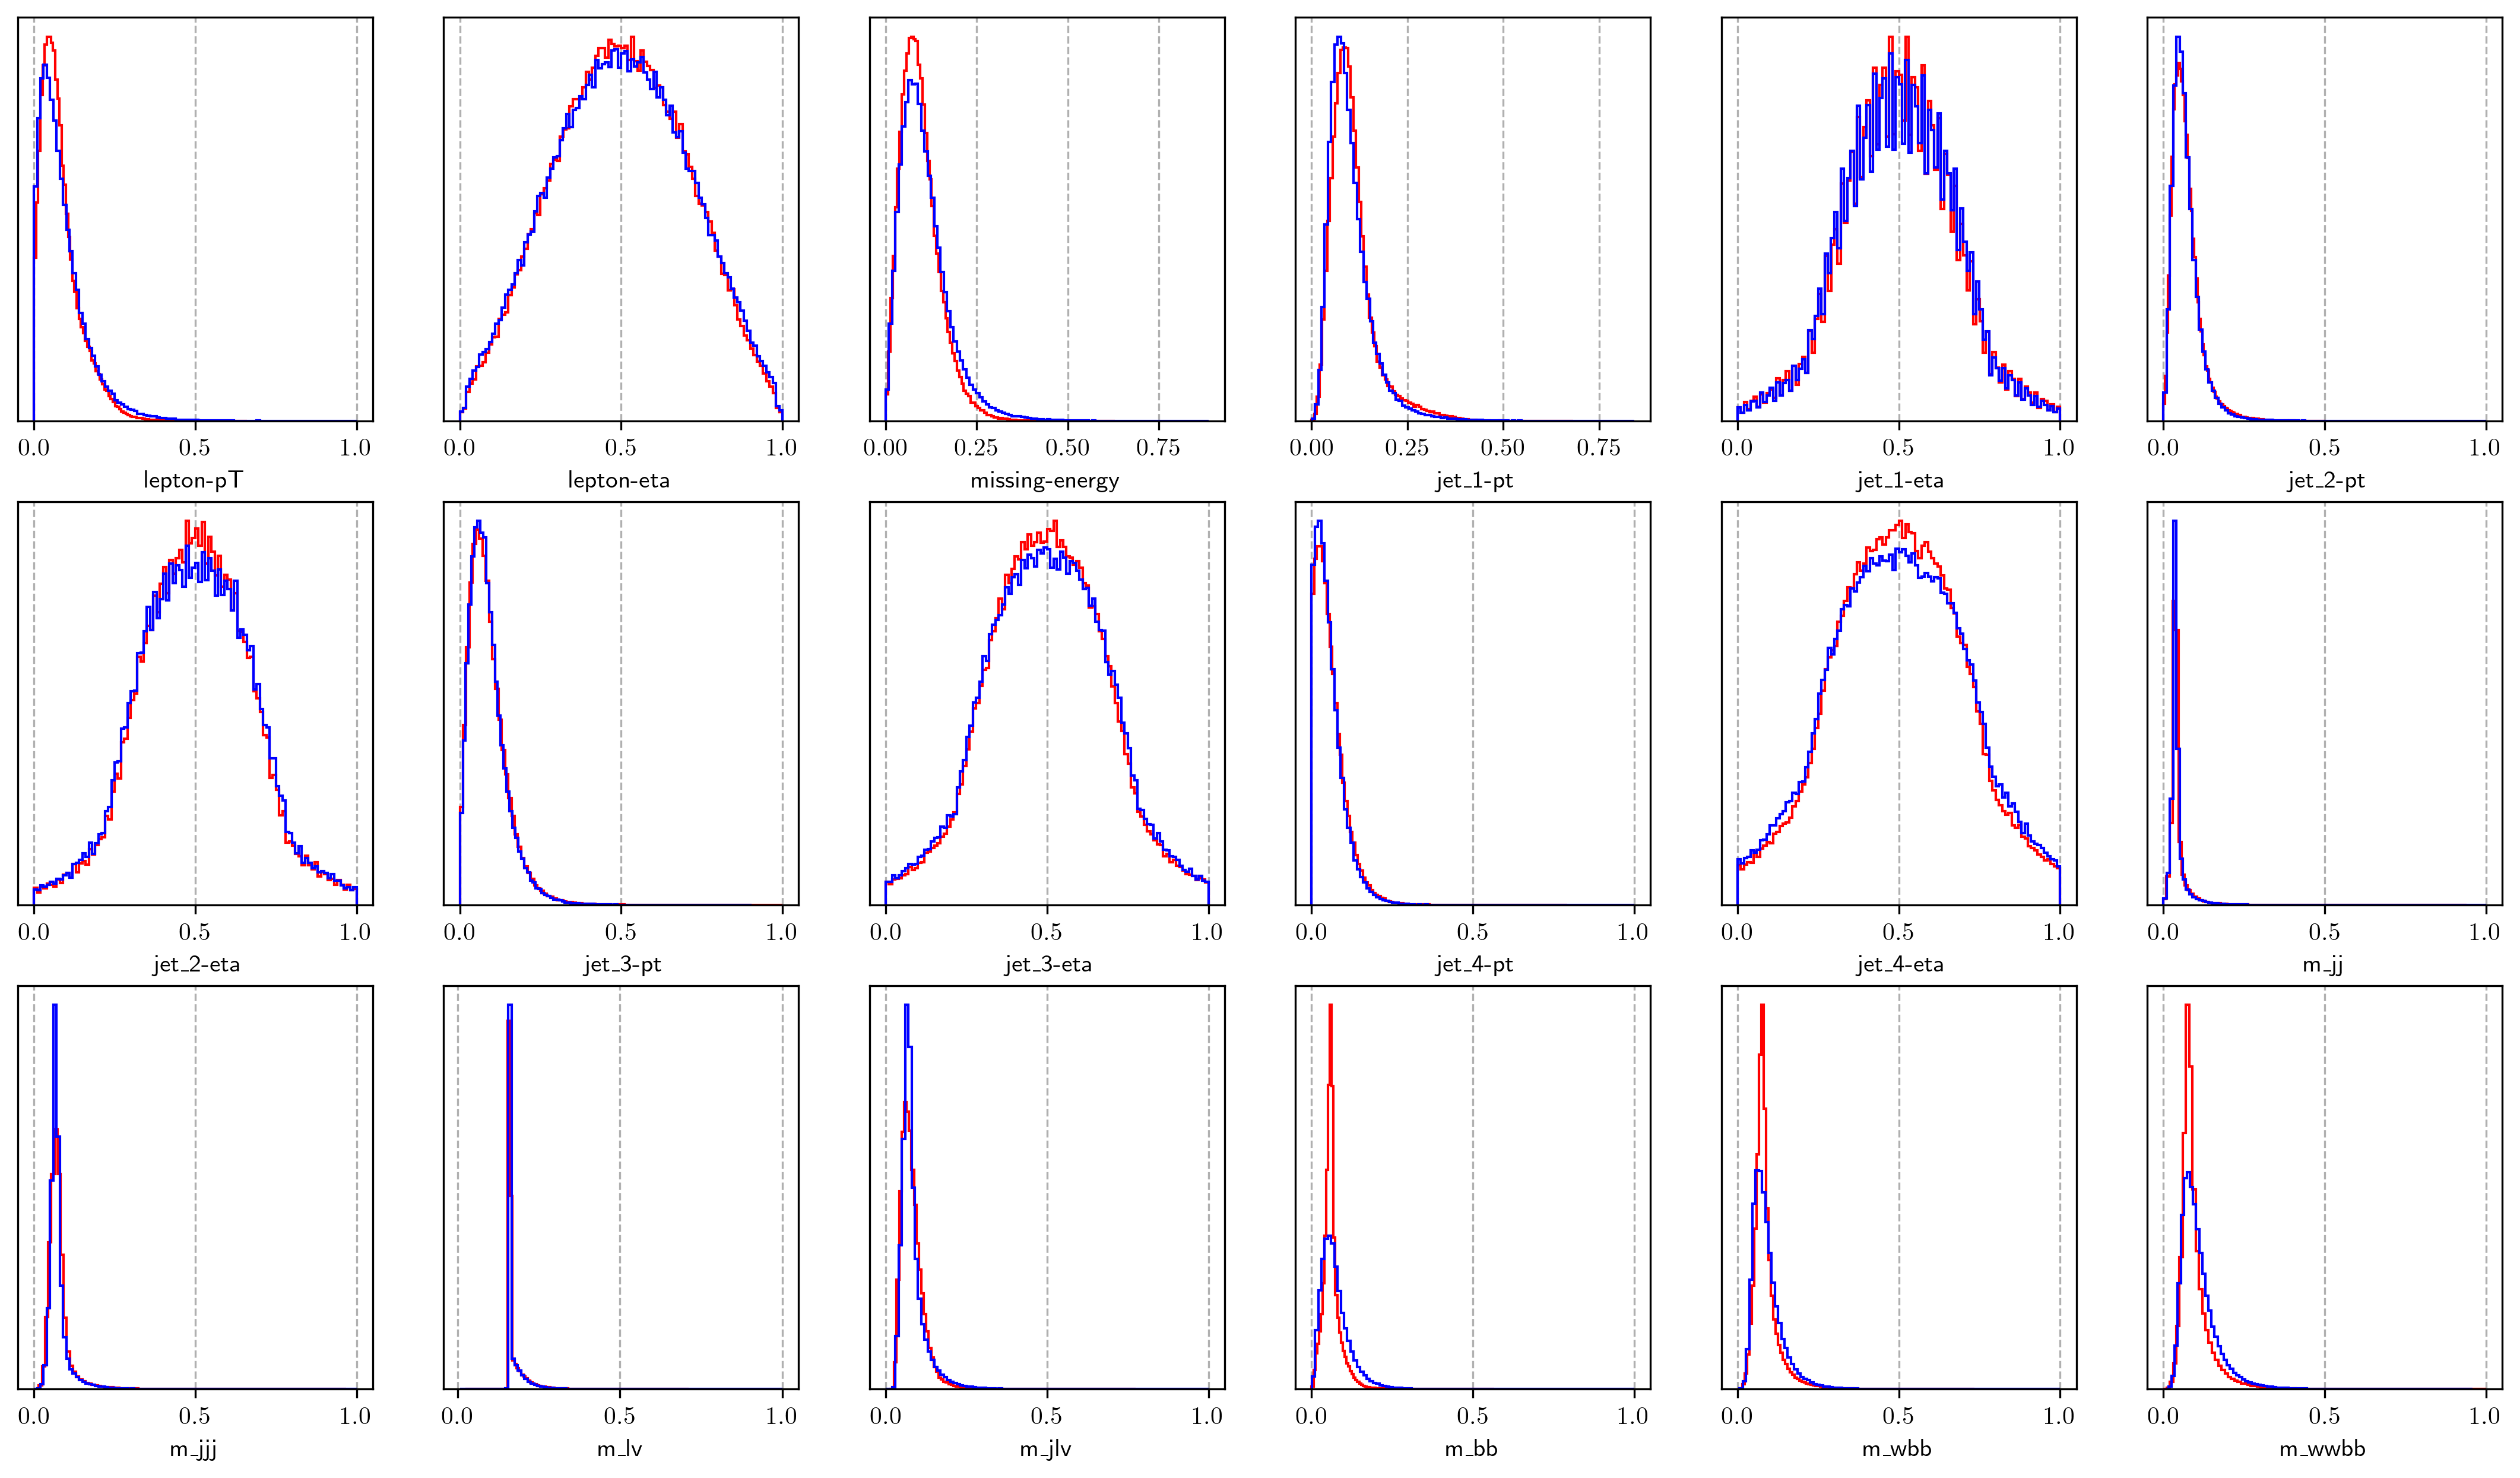

Steps train:360 and test:40
Features: (1000, 18)
Labels: (1000,)
Features: (1000, 18)
Labels: (1000,)


/Users/luka/.pyenv/versions/3.11.2/envs/phys/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_63"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ dense_240 (Dense)               ‚îÇ (None, 50)             ‚îÇ           950 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_241 (Dense)               ‚îÇ (None, 50)             ‚îÇ         2,550 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_242 (Dense)               ‚îÇ (None, 1)              ‚îÇ            51 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ lambda_1 (Lambda)               ‚îÇ (None)                 ‚îÇ             0 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 3,551 (13.87 KB)

 Trainable params: 3,551 (13.87 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/100
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 15ms/step - AUC: 0.5608 - accuracy: 7.1265e-04 - binary_crossentropy: 0.7085 - loss: 0.7085 - val_AUC: 0.5308 - val_accuracy: 0.0000e+00 - val_binary_crossentropy: 0.6910 - val_loss: 0.6910
Epoch 2/100
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 15ms/step - AUC: 0.5375 - accuracy: 0.0000e+00 - binary_crossentropy: 0.7117 - loss: 0.7117 - val_AUC: 0.5160 - val_accuracy: 0.0000e+00 - val_binary_crossentropy: 0.6912 - val_loss: 0.6912
Epoch 3/100
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 14ms/step - AUC: 0.5225 - accuracy: 0.0069 - binary_crossentropy: 0.7959 - loss: 0.7959 - val_AUC: 0.5000 - val_accuracy: 0.4250 - val_binary_crossentropy: 7.4515 - val_loss: 7.4515
Epoch 4/100
360/360 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 13ms/step - AUC: 0.5000 - accuracy: 0.5162 - binary_crossentropy: 7.5174 - loss: 7.5174 - val_AUC: 0.

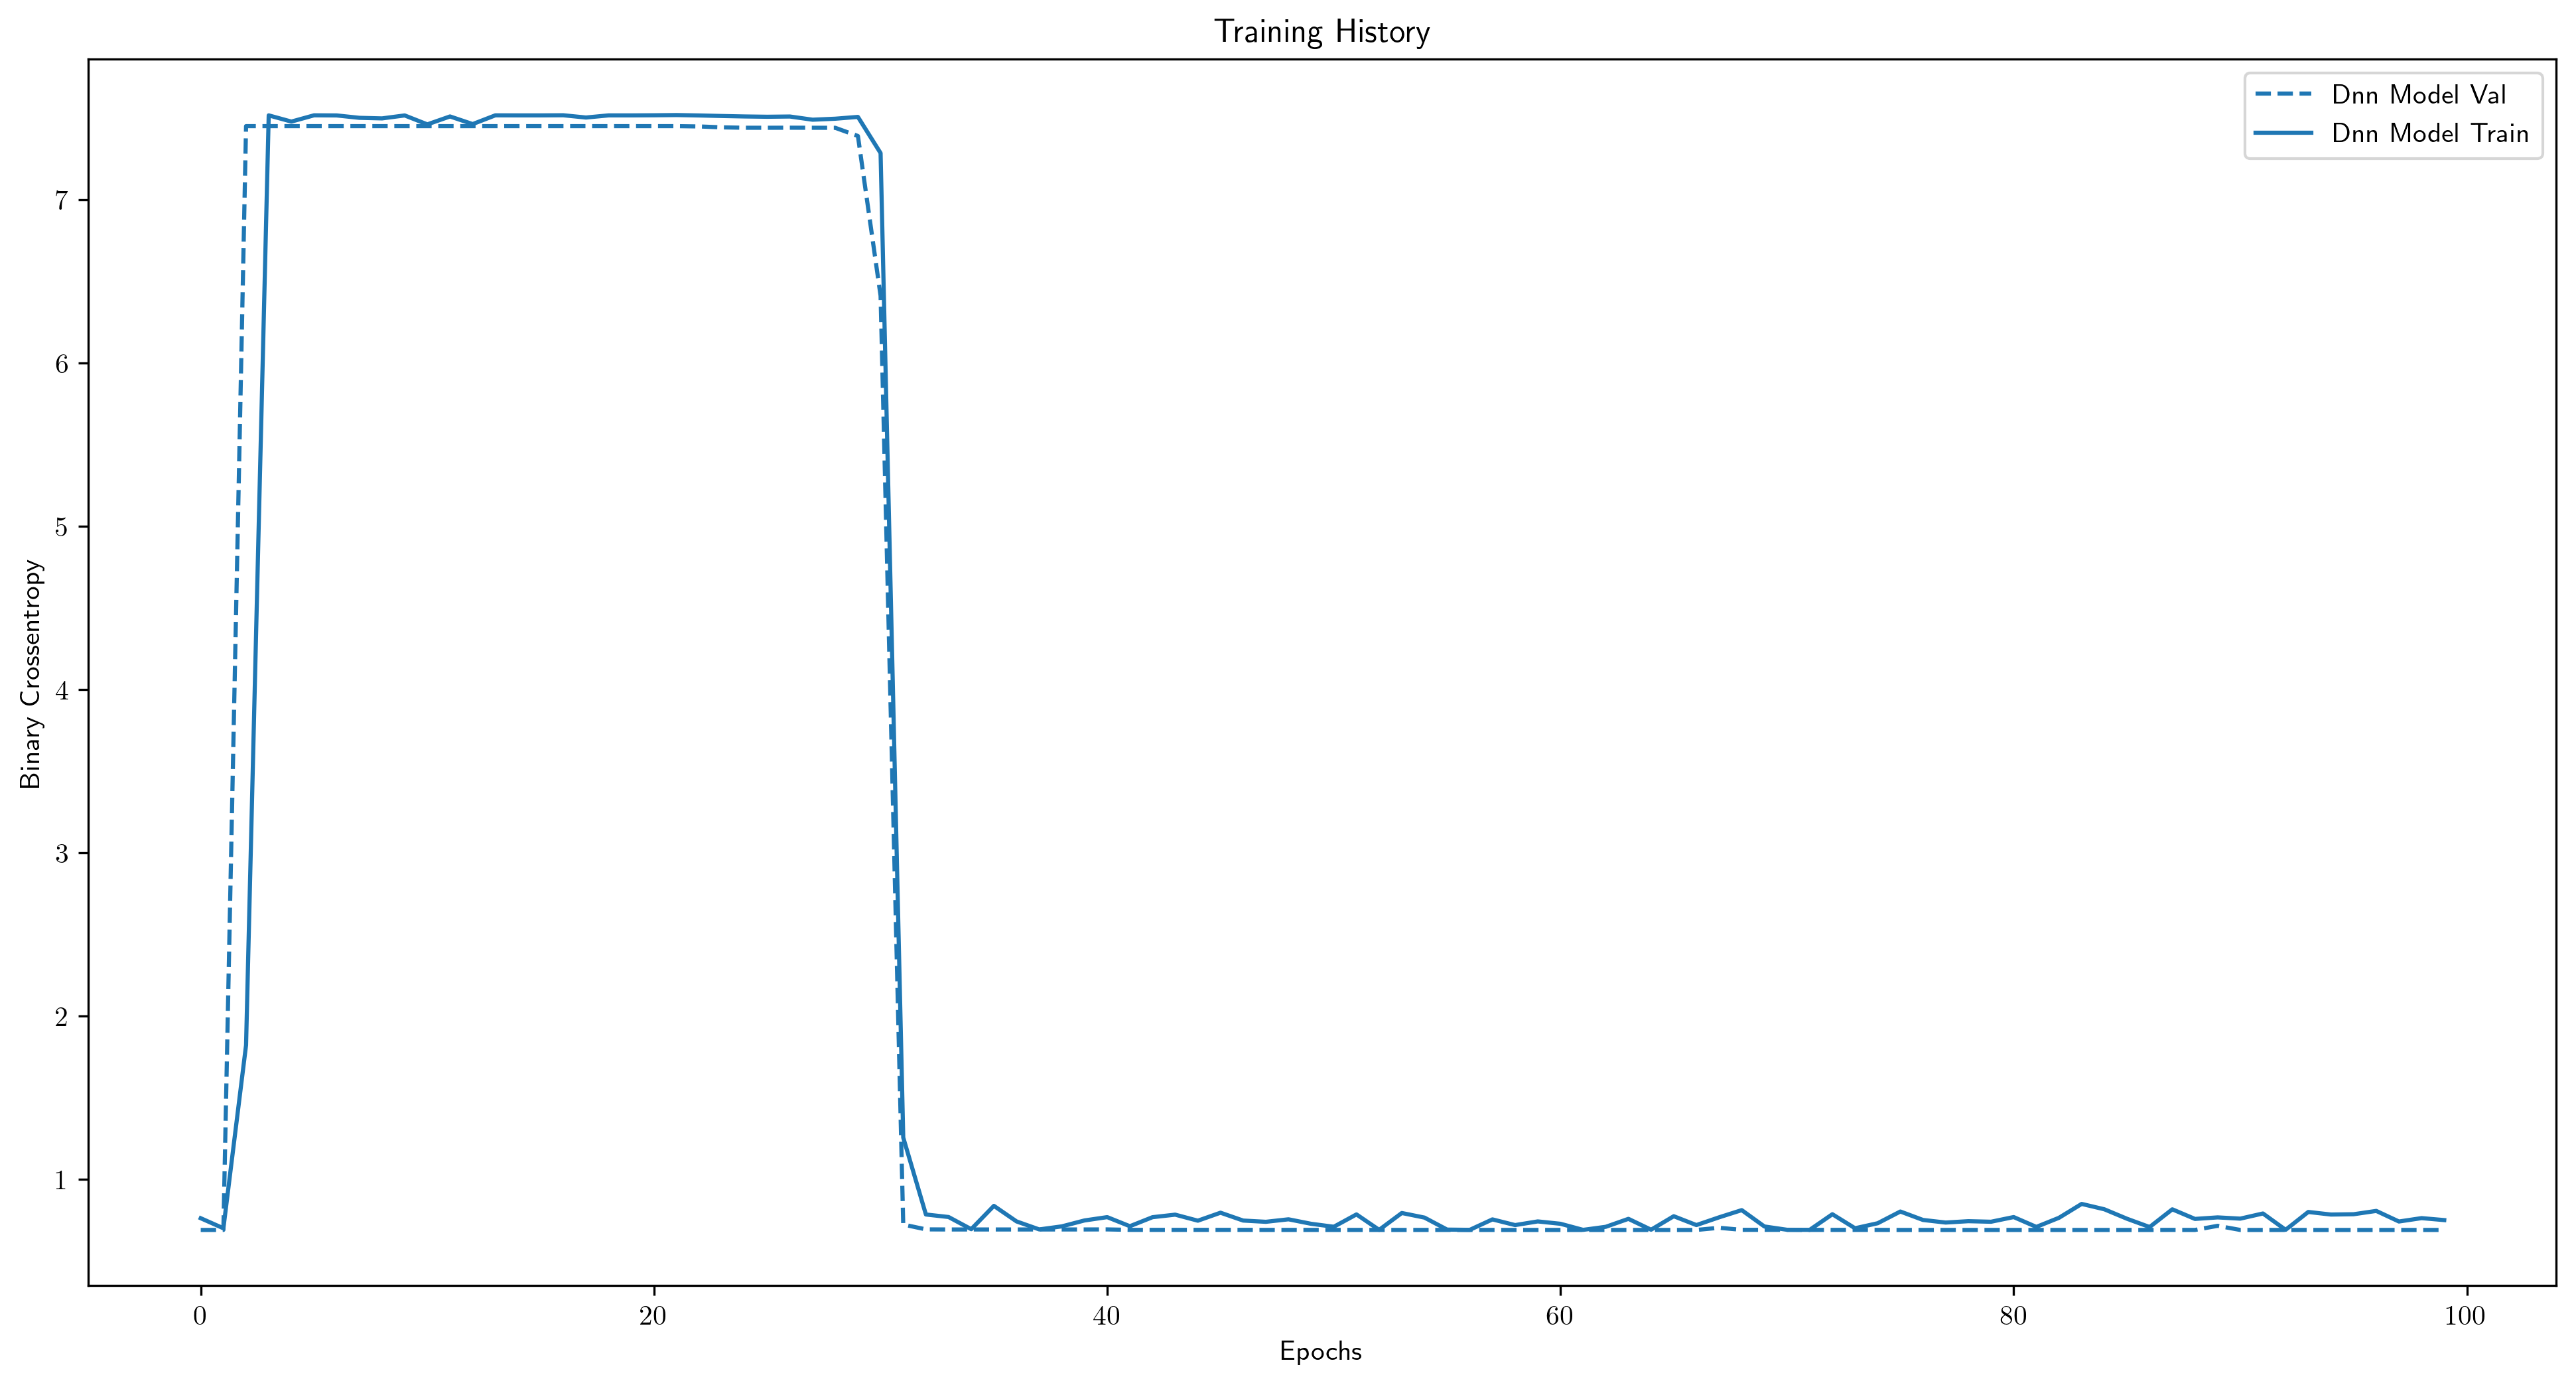

KeyError: 'val_auc'

<Figure size 4800x2400 with 0 Axes>

In [224]:
hdata = pd.HDFStore('./data/higgs-parsed/higgs-parsed.h5', 'r')
print("Entries in the file: ",hdata.keys())

data_fnames=hdata['feature_names'].to_numpy()[1:] #drop labels
n_dims=data_fnames.shape[0]

print ("Entries read {} with feature names {}".format(n_dims,data_fnames))

x_trn,y_trn=split_xy(hdata['train']) # training sample, should split a fraction for testing
p = 0.9
N = len(x_trn)
x_train, x_test,y_train, y_test =  x_trn[:int(p*N)], x_trn[int(p*N):], y_trn[:int(p*N)], y_trn[int(p*N):] #train_test_split(x_trn,y_trn,test_size=0.1) # 10% split
x_val,y_val=split_xy(hdata['valid']) # independent cross-valid sample


print("Shapes train:{} and test:{}".format(x_train.shape,x_test.shape))
print("Y shapes: {} and {}".format(y_train.shape,y_test.shape))

#plot distributions
plotting.plot_sig_bkg_from_np_arrays(x_train.to_numpy(),y_train.to_numpy(),data_fnames,logy=False)

# ready the data for TF
ds_train = tf.data.Dataset.from_tensor_slices((x_train.to_numpy(),y_train.to_numpy()))
ds_train = ds_train.repeat()
ds_train = ds_train.batch(BATCH_SIZE,drop_remainder=True)

ds_test = tf.data.Dataset.from_tensor_slices((x_test.to_numpy(),y_test.to_numpy()))
ds_test = ds_test.repeat()
ds_test = ds_test.batch(BATCH_SIZE,drop_remainder=True)    

train_steps=int(x_train.shape[0]/BATCH_SIZE)
test_steps=int(x_test.shape[0]/BATCH_SIZE)
print("Steps train:{} and test:{}".format(train_steps,test_steps))

for x, y in ds_train.take(1):
    print("Features:", x.numpy().shape)
    print("Labels:", y.numpy().shape)

for x, y in ds_test.take(1):
    print("Features:", x.numpy().shape)
    print("Labels:", y.numpy().shape)


# build a model - a DNN in TF 2.0
dnn = Sequential([
    Input(shape=(n_dims,)), 
    Dense(50, input_dim=n_dims, activation='relu'),
    Dense(50, input_dim=n_dims, activation='relu'),
    Dense(1, activation='sigmoid'),
    Lambda(lambda x: tf.squeeze(x, axis=-1))  # Converts (None, 1) to (None,)
])

dnn.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'binary_crossentropy'])

dnn.summary()

#optional early stopping
eval_metric = 'AUC'
earlystop_callback = EarlyStopping(
        mode='max',
        monitor='val_' + eval_metric,
        patience=5,
        min_delta=0.00001,
        verbose=1
    )

print()

#run the training
dnn_model_history = dnn.fit(ds_train,
        epochs=nepoch,
        steps_per_epoch=train_steps,
        #callbacks=[earlystop_callback],
        validation_data=ds_test,
        validation_steps=test_steps
    )

#plot training history
print("history values",dnn_model_history.history.keys())
plotting.plot_history([('DNN model', dnn_model_history),],key='binary_crossentropy')
plotting.plot_history([('DNN model', dnn_model_history),],key='auc')
plotting.plot_history([('DNN model', dnn_model_history),],key='accuracy')

#plot & print results like ROC and score distribution etc...
y_score=dnn.predict(x_val.to_numpy())[:,0]
plotting.plot_roc(y_val,y_score)
plotting.plot_score(y_val,y_score)
print()
auc=roc_auc_score(y_val,y_score)
print("AUC score: {}".format(auc))


## Zakljuƒçek

---
Luka Skeled≈æija, [Github source üîó](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/12_mlearn), 2024